In [1]:
#importing the required libraries
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import mnist
import math


In [2]:
#loading the train data
(train_images , train_label) , (test) = mnist.load_data()
print(train_images.shape)
print(train_label.shape)

#Initialising the number of dimensions in the 1D array of a single datapoint
Num_of_Dimensions = train_images.shape[1] * train_images.shape[2]

#Converting every 28 * 28 matrix into a 1D matrix of length 784
train_images_1D = np.full((60000 , Num_of_Dimensions) , 0)
for i in range(60000):
    train_images_1D[i] = train_images[i].flatten()

image_sample100 = []
for i in range(10):
    image_sample100.append([]) #Creating 10 empty lists

for i in range(60000):
    label = train_label[i]
    if(len(image_sample100[label]) < 100): #Loading the first 100 images of each label 
        image_sample100[label].append(train_images_1D[i])  #Storing the image(1D array) according to its label to the list

X_data = []
for i in range(10):
    for j in range(100):
        X_data.append(image_sample100[i][j]) #Storing all the values in a 2D array irrespective of it's label


Num_of_sample_images = 1000

X_data = np.array(X_data ,dtype='float64') #Creating a numpy 2D array of size number of images 

X_data = X_data.transpose()
print(X_data.shape)



(60000, 28, 28)
(60000,)
(784, 1000)


In [3]:
def Polynomial_Kernal(Power_of_Polynomial_Kernal : int , X_data):
    Kernal_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , dtype='float64')
    Kernal_Matrix_After_Centralised = np.full((Num_of_sample_images,Num_of_sample_images),0.0 , dtype= 'float64')

    #Finding the Kernal Matrix
    Kernal_Matrix = (np.full((Num_of_sample_images,Num_of_sample_images) , 1.0 , dtype='float64') + np.matmul(X_data.transpose() , X_data , dtype= 'float64')) **Power_of_Polynomial_Kernal

    #Finding mean transpose dot mean and filling a matrix n*n with it's values 
    Mean_transpose_dot_Mean = np.sum(Kernal_Matrix) / (Num_of_sample_images**2)
    Mean_transpose_dot_Mean_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , Mean_transpose_dot_Mean , dtype='float64')

    Row_Sum_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , dtype='float64')
    Column_Sum_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , dtype='float64')

    #Finding the sum of the rows divided by number of data points 
    for i in range(Num_of_sample_images):
        Row_Sum_Matrix[i] = np.full(Num_of_sample_images,np.sum(Kernal_Matrix[i]))
    Row_Sum_Matrix /= Num_of_sample_images

    #Finding the sum of the columns divided by number of data points 
    for j in range(Num_of_sample_images):
        Column_Sum_Matrix[:,j] = np.full(Num_of_sample_images,np.sum(Kernal_Matrix[:,j]))
    Column_Sum_Matrix /= Num_of_sample_images

    #Finding the centralised matrix 
    Kernal_Matrix_After_Centralised = Kernal_Matrix - Row_Sum_Matrix - Column_Sum_Matrix + Mean_transpose_dot_Mean_Matrix
    return Kernal_Matrix_After_Centralised    

In [4]:

def Radial_Kernal(variance  , X_data):
    Kernal_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , dtype='float64')
    Kernal_Matrix_After_Centralised = np.full((Num_of_sample_images,Num_of_sample_images),0.0 , dtype= 'float64')

    #Finding the Kernal Matrix
    for i in range(Num_of_sample_images):
        for j in range(Num_of_sample_images):
            Kernal_Matrix[i][j] = math.exp((-1 * np.dot(X_data[:,i] - X_data[:,j],X_data[:,i] - X_data[:,j]))/(2*(variance**2)))

    #Finding mean transpose dot mean and filling a matrix n*n with it's values 
    Mean_transpose_dot_Mean = np.sum(Kernal_Matrix) / (Num_of_sample_images**2)
    Mean_transpose_dot_Mean_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , Mean_transpose_dot_Mean , dtype='float64')

    Row_Sum_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , dtype='float64')
    Column_Sum_Matrix = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , dtype='float64')

    #Finding the sum of the rows divided by number of data points 
    for i in range(Num_of_sample_images):
        Row_Sum_Matrix[i] = np.full(Num_of_sample_images,np.sum(Kernal_Matrix[i]) ,dtype='float64')
    Row_Sum_Matrix /= Num_of_sample_images
    
    #Finding the sum of the columns divided by number of data points 
    for j in range(Num_of_sample_images):
        Column_Sum_Matrix[:,j] = np.full(Num_of_sample_images,np.sum(Kernal_Matrix[:,j]) ,dtype='float64')
    Column_Sum_Matrix /= Num_of_sample_images

    #Finding the Centralised Matrix 
    Kernal_Matrix_After_Centralised = Kernal_Matrix - Row_Sum_Matrix - Column_Sum_Matrix + Mean_transpose_dot_Mean_Matrix
 
    return Kernal_Matrix_After_Centralised 

In [5]:
#initialising a list for storing the number of components required for explpaining 95% of the variance 
Num_of_Components_for_95Percent_variance = []

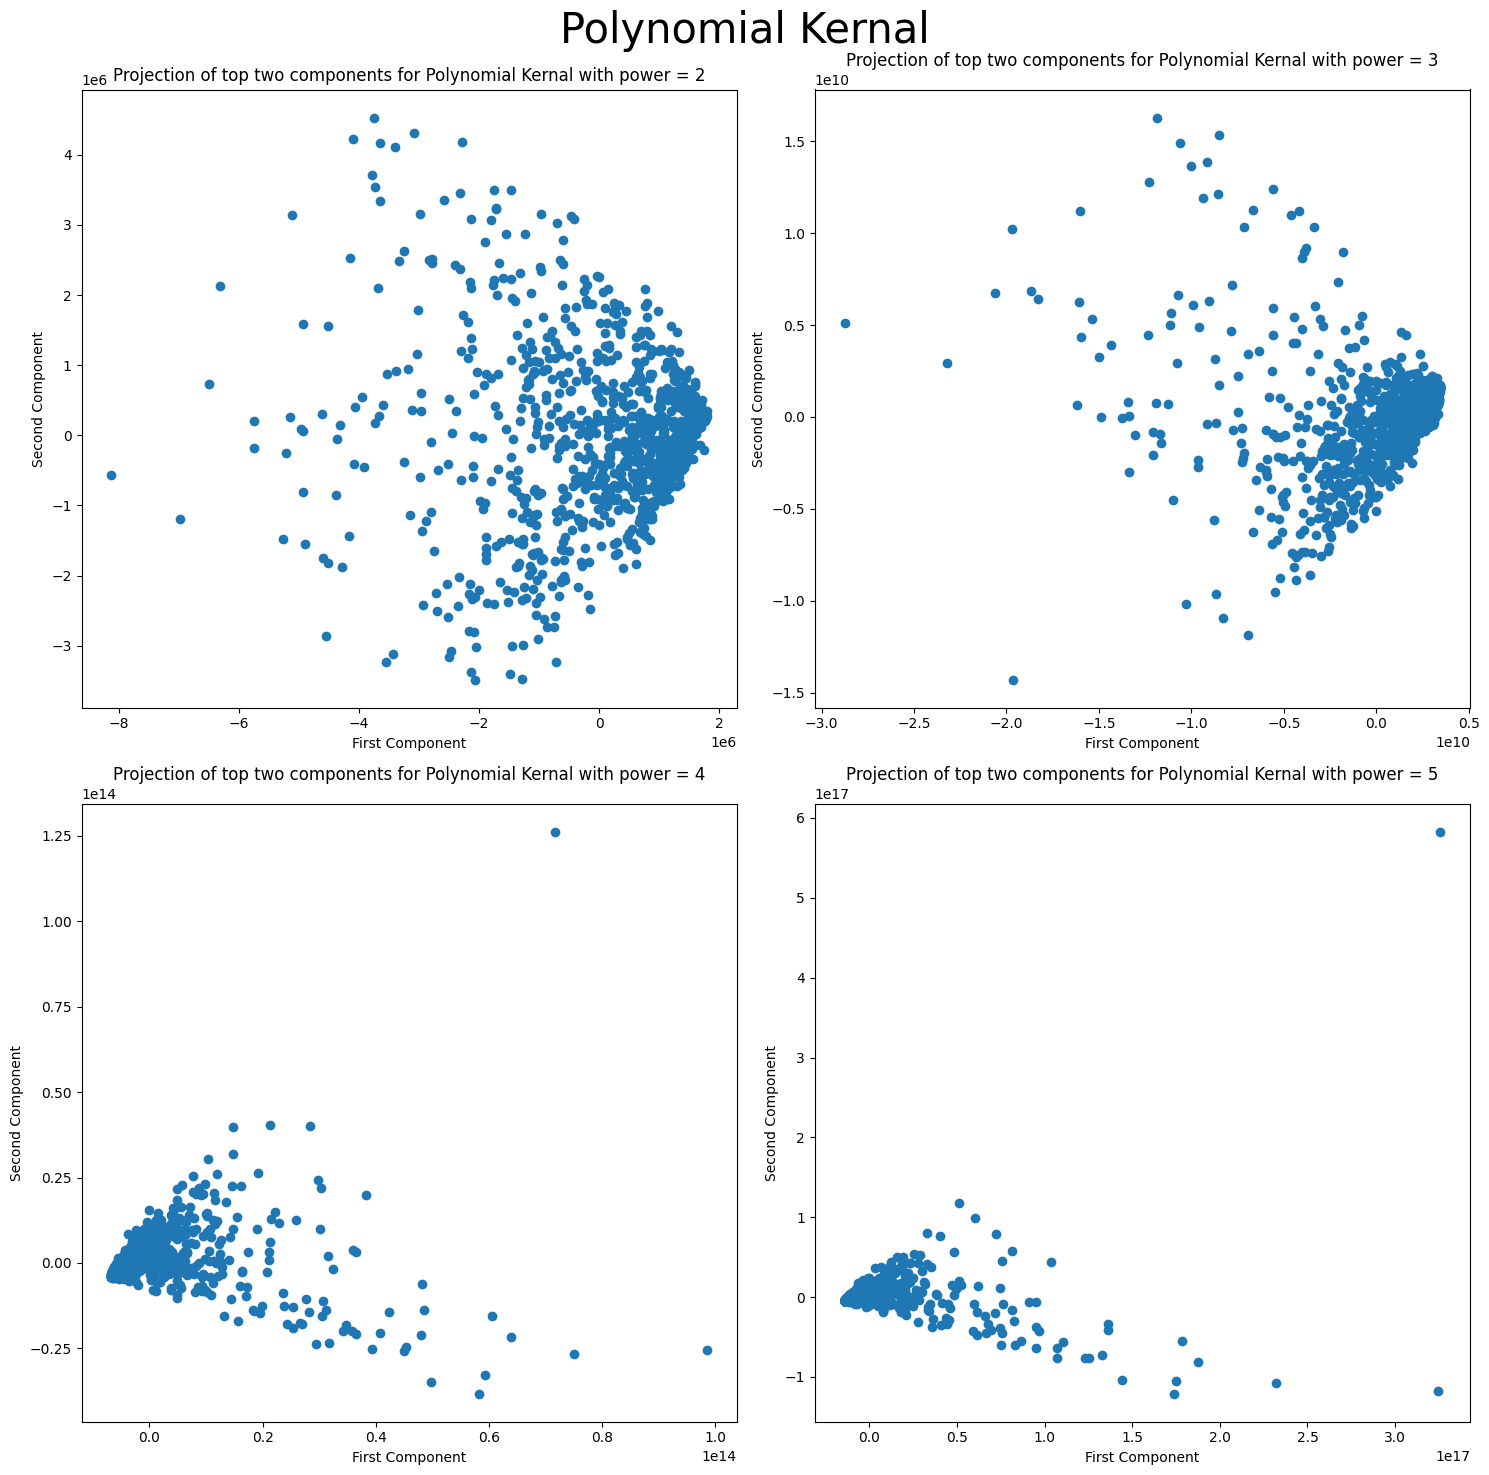

In [6]:

Powers_of_Polynomial_Kernal = [2, 3, 4 , 5 ]
fig , axes = plt.subplots(2,2 , figsize=(15,15))
#For powers 2 ,3 ,4 ,5 
for Power in Powers_of_Polynomial_Kernal:

    Kernal_Matrix_P = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , )
    #Finding the Centralised Kernal Matrix using the Function by passing the Power Parameter  
    Kernal_Matrix_P = Polynomial_Kernal(Power , X_data)

    
    Kernal_Eigenvalues_P , Kernal_Eigenvectors_P = np.linalg.eigh(Kernal_Matrix_P)

    

    #Sorting eigenvectors in the descending orders of their respective eigenvalues
    Kernal_Eigenvectors_Beta_P = Kernal_Eigenvectors_P[:,np.flip(np.argsort(Kernal_Eigenvalues_P ))]

    #Sorting the eigenvalues in descending order
    Kernal_Eigenvalues_Beta_P = Kernal_Eigenvalues_P[np.flip(np.argsort(Kernal_Eigenvalues_P))]

    #Finding the number of components required for 95% variance and appending it to the list of components 
    Sum = (Kernal_Eigenvalues_Beta_P.sum()) / Num_of_sample_images
    Sum_until_ith_eigenvalue = 0
    for i in range(len(Kernal_Eigenvalues_Beta_P)):
        Sum_until_ith_eigenvalue += (Kernal_Eigenvalues_Beta_P[i] ) / Num_of_sample_images
        if(Sum_until_ith_eigenvalue >= 0.95 * Sum):
            Num_of_Components_for_95Percent_variance.append(i) 
            break


    Kernal_Eigenvectors_Alpha_P = np.full((Num_of_sample_images,Num_of_sample_images) , 0.00 , dtype= 'float64')
   
    Num_of_Kernal_PCA_Components = 2
    #Finding Alpha Eigen vectors for the required number of components which is 2
    for i in range(Num_of_Kernal_PCA_Components):
        Kernal_Eigenvectors_Alpha_P[:,i] = Kernal_Eigenvectors_Beta_P[:,i] / (( math.sqrt(Kernal_Eigenvalues_Beta_P[i])))


    After_Kernal_PCA_data_P = np.full((Num_of_sample_images , Num_of_Kernal_PCA_Components) , 0.00 , dtype= 'float64')
    #Finding the top two component's representatives of the data 
    After_Kernal_PCA_data_P = np.matmul(Kernal_Matrix_P , Kernal_Eigenvectors_Alpha_P[:,0:2])
    
    #Plotting the points 
    axes[Power//2 -1 , Power%2].scatter(After_Kernal_PCA_data_P[:,0] , After_Kernal_PCA_data_P[:,1])
    axes[Power//2 -1 , Power%2].set_title(f'Projection of top two components for Polynomial Kernal with power = {Power}')
    axes[Power//2 -1 , Power%2].set_xlabel('First Component')
    axes[Power//2 -1 , Power%2].set_ylabel('Second Component')
fig.suptitle("Polynomial Kernal" , fontsize = 30)
plt.tight_layout()
'''plt.savefig("Polynomial_Kernal")'''
plt.show()


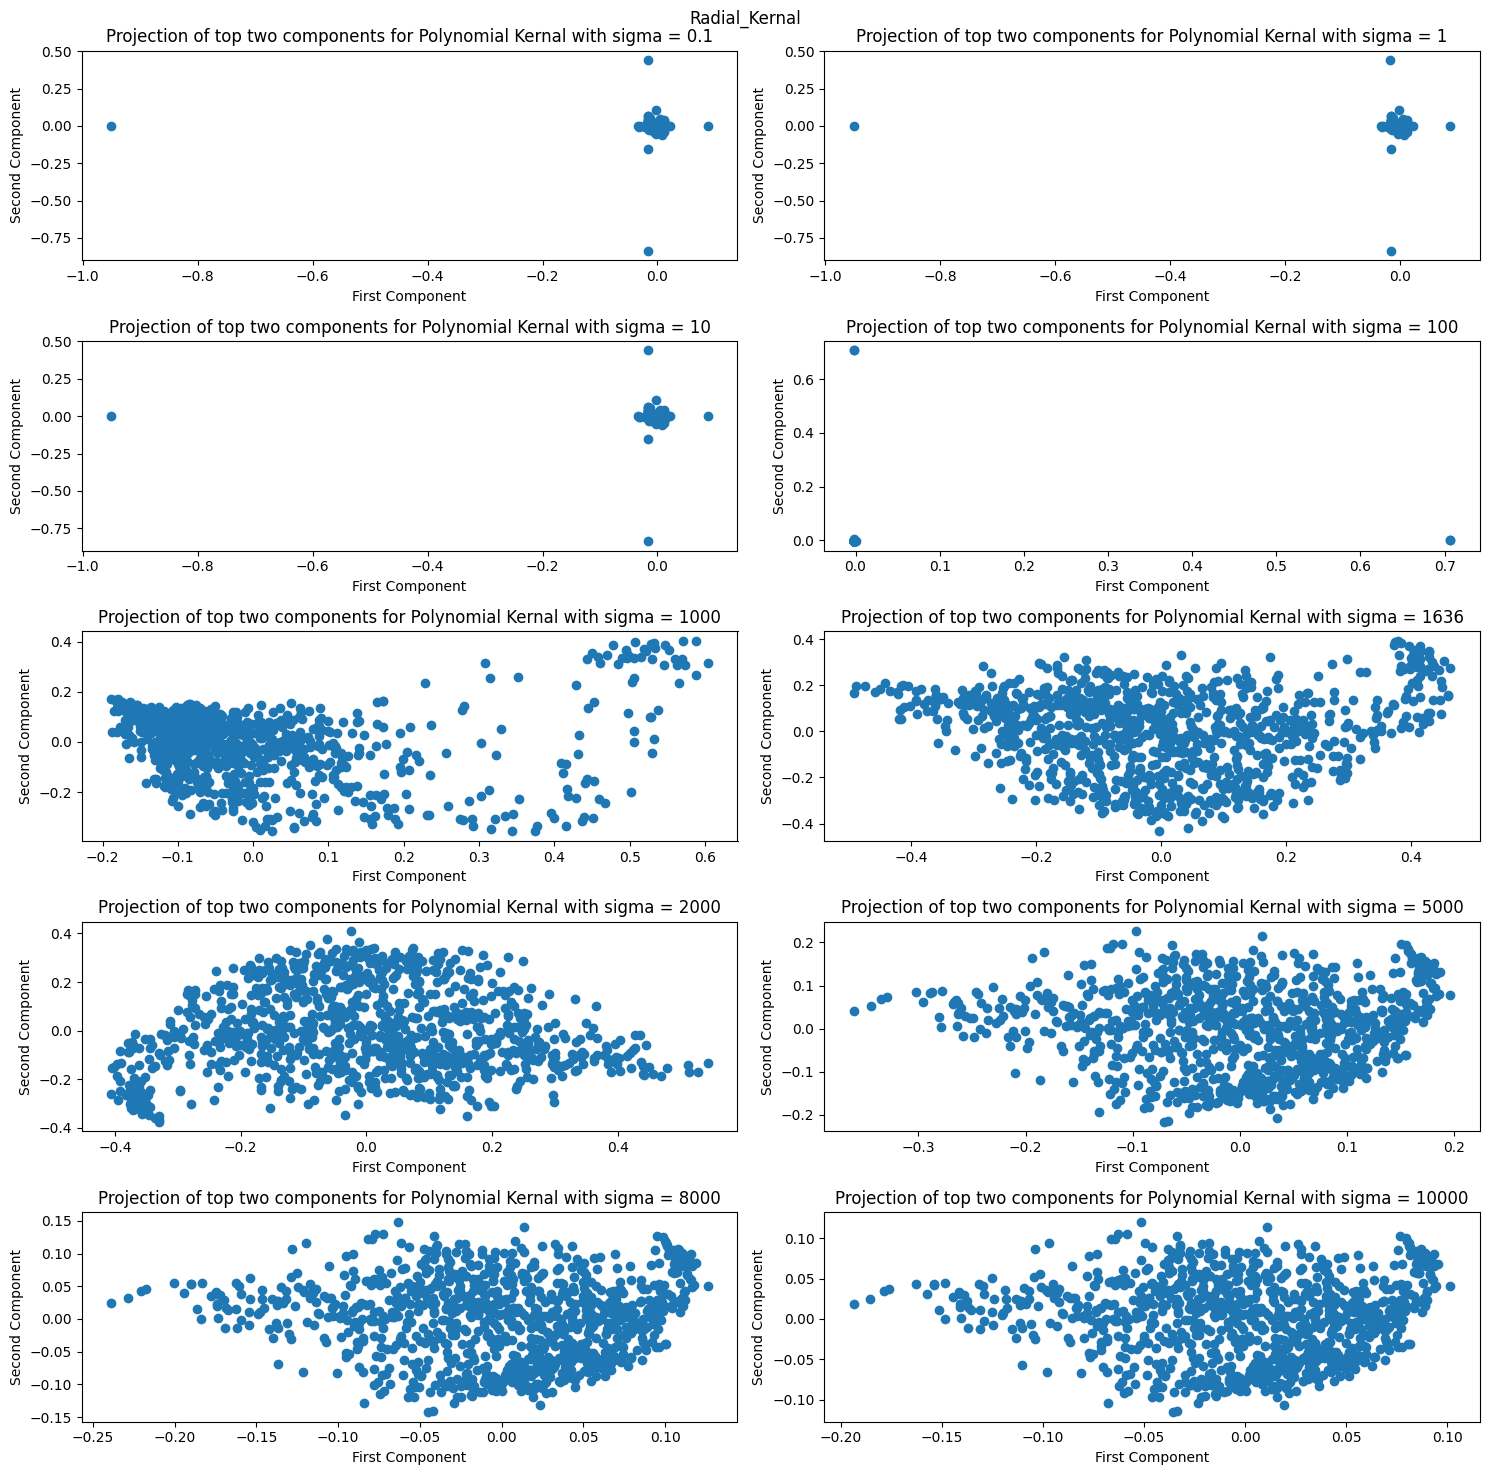

In [7]:
Variance_in_Radial_Kernal =[ 0.1 ,1 ,10, 100 , 1000 ,1636 ,2000, 5000,8000 , 10000 ]
#Best Variance 1636 i.e sum of eigenvalues peaked at 1636
fig , axes = plt.subplots(nrows=5 , ncols=2 , figsize = (15,15))
#For variances 0.1 , 1 , 10 , 100 , 1000 , 1636 , 2000 , 5000 , 8000 , 10000
for var in range(len(Variance_in_Radial_Kernal)):
    Kernal_Matrix_R = np.full((Num_of_sample_images,Num_of_sample_images) , 0.0 , dtype='float64')

    #Finding the Centralised Kernal Matrix using the Function by passing the Variance Parameter  
    Kernal_Matrix_R = Radial_Kernal(Variance_in_Radial_Kernal[var] , X_data)

    Kernal_Eigenvalues_R , Kernal_Eigenvectors_R = np.linalg.eigh(Kernal_Matrix_R)

    #Sorting eigenvectors in the descending orders of their respective eigenvalues
    Kernal_Eigenvectors_Beta_R = Kernal_Eigenvectors_R[:,np.flip(np.argsort(Kernal_Eigenvalues_R ))]

    #Sorting the eigenvalues in descending order
    Kernal_Eigenvalues_Beta_R = Kernal_Eigenvalues_R[np.flip(np.argsort(Kernal_Eigenvalues_R))]
  
    #Finding the number of components required for 95% variance and appending it to the list of components 
    Sum = (Kernal_Eigenvalues_Beta_R).sum() / Num_of_sample_images
    Sum_until_ith_eigenvalue = 0
    for i in range(len(Kernal_Eigenvalues_Beta_R)):
        Sum_until_ith_eigenvalue += (Kernal_Eigenvalues_Beta_R[i]) / Num_of_sample_images
        if(Sum_until_ith_eigenvalue >= 0.95 * Sum):
            Num_of_Components_for_95Percent_variance.append(i) 
            break

    Kernal_Eigenvectors_Alpha_R = np.full((Num_of_sample_images,Num_of_sample_images) , 0.00 , dtype= 'float64')

    Num_of_Kernal_PCA_Components = 2
    #Finding Alpha Eigen vectors for the required number of components which is 2
    for i in range(Num_of_Kernal_PCA_Components):
        Kernal_Eigenvectors_Alpha_R[:,i] = Kernal_Eigenvectors_Beta_R[:,i] / (( math.sqrt((Kernal_Eigenvalues_Beta_R[i]))))

    After_Kernal_PCA_data_R = np.full((Num_of_sample_images , Num_of_Kernal_PCA_Components) , 0.00 , dtype= 'float64')

    #Finding the top two component's representatives of the data 
    After_Kernal_PCA_data_R = np.matmul(Kernal_Matrix_R , Kernal_Eigenvectors_Alpha_R[:,0:Num_of_Kernal_PCA_Components])
    
    #Plotting the points
    axes[var//2 , var % 2].scatter(After_Kernal_PCA_data_R[:,0] , After_Kernal_PCA_data_R[:,1])
    axes[var//2 , var % 2].set_title(f'Projection of top two components for Polynomial Kernal with sigma = {Variance_in_Radial_Kernal[var]}')
    axes[var//2 -1 , var%2].set_xlabel('First Component')
    axes[var//2 -1 , var%2].set_ylabel('Second Component')
fig.suptitle("Radial_Kernal")
plt.tight_layout()
'''plt.savefig("Radial_Kernal_PCA")'''

plt.show()

In [8]:
print(Num_of_Components_for_95Percent_variance)
#The first four represent the polynomial kernal with 2 , 3 ,4 ,5
# And the next 10 represent the Radial Kernal with sigma values 0.1 , 1 , 10 , 100 , 1000 , 1636 ,2000 , 5000 , 8000 , 10000

[490, 550, 519, 462, 949, 949, 949, 949, 815, 652, 564, 222, 161, 148]
